In [151]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings

# Analyzing Academic Performance: Demographic Insights and Risk Stratification

## Project Overview
This analysis delved into the academic performance of students, focusing on identifying demographic patterns and the factors influencing class failure rates during a single semester (Fall 2023). It was a descriptive study, not predictive or machine learning-based, aiming to understand academic performance through various analytical lenses.

## Scope of the Study
**Analytical Approach:** Employed descriptive statistics, correlation analysis, clustering (KMeans), and OLS regression to uncover trends and patterns in class failure rates, without assuming linear relationships.

**Data Compilation:** Utilized Cognos reports to extract features for demographic insights, educational engagement, and academic success indicators.

**Limitations:** Analysis confined to a single semester, limiting historical comparisons and trend analysis.

## Data Preparation and Exploration
The study commenced with the careful preparation and examination of datasets, ensuring completeness and coherence. Key processes included:

**Merging and Cleaning:** Integrated various datasets to form a comprehensive dataset for analysis, focusing on broad demographic insights and educational engagement patterns.

**Primary Metric Insight:** Centered on 'Class Failure Rates' to identify factors affecting students' likelihood of failing classes.

**Analytical Techniques:** Initial exploration was done using descriptive statistics for foundational insights, followed by clustering to identify student groups with similar demographic profiles. Correlations and linear regressions were applied to validate findings and understand the overarching trends.

## Bias Reduction and Privacy
To minimize bias and protect privacy, the study prioritized anonymizing data by aggregating individual performance into 'Class Failure Rates' and excluding specific identifiers like student ID and program details. The aim was to provide generalized insights into academic challenges, respecting student anonymity and data sensitivity.

## Analytical Framework

**Creation of Indicators, Metrics, and Submetrics**
Developed a framework of indicators, metrics, and submetrics to systematically analyze student performance. This structured approach enabled the standardization of features for measurable analysis, encompassing demographic insights, educational engagement factors, and background support variables.

**Correlation Analysis and Clustering**
Performed correlation analysis to identify significant relationships between variables, emphasizing the complex nature of academic performance. Applied K-means clustering to segment the student population into groups with distinct academic challenges, using the insights gained from the correlation analysis and the structured analytical framework.

## Visualization and Insights
Created shaded graphs and other visualizations to illustrate the distribution of failure rates across various categories and clusters. These visual representations were pivotal in communicating findings effectively. Revealed critical insights, such as the disproportionate impact of certain demographic and educational engagement factors on student failure rates.

## Tools and Technologies
**Jupyter Notebook:** Served as the interactive computational environment for coding, visualization, and analysis. Python Libraries: Utilized pandas for data manipulation, NumPy for numerical computations, seaborn and matplotlib for data visualization, sklearn for machine learning tasks, and statsmodels for regression analysis. Key Findings Framework Application: The indicators, metrics, and submetrics framework facilitated a granular analysis of failure rates, unveiling nuanced insights into the factors affecting student performance. Class Failure Rates Analysis: Highlighted the multifaceted influences on student failure rates, underscoring the importance of targeted support strategies for different student segments. Visualization: The iterative development of shaded graphs provided a clear, visual understanding of the complex data, enhancing the interpretability of the findings.

## **Rather than seeking direct relationships between individual features and failure rates, my goal is to identify patterns and insights that can inform more nuanced strategies for academic support.**

####  Loading the failure report dataset for initial exploration
#### The dataset contains information on students' performance and will be used to analyze failure rates.

In [155]:
failure_df = pd.read_csv("202308 Failure Report  update  Jan 26.csv")

# Display only the column names
print(failure_df.columns.tolist())

['TERM_CODE', 'SPRIDEN_ID', 'RESIDENCY', 'PROGRAM_DESC', 'CAMPUSES', 'Final Grade']


#### Loading additional datasets related to withdrawn students and grade analysis

### Identifiyng those who have left the institution.

In [156]:
withdrawn_df = pd.read_csv("202308 withdrawn.csv", encoding='latin1')

# Display only the column names
print(withdrawn_df.columns.tolist())

['Term', 'Student ID', 'Enrol Status', 'Status Code', 'FT', 'Prev Standing Code', 'Campus Name']


#### Loading additional audited dataset related to failed classes and grade analysis to check consistency

In [172]:
F_grade_df = pd.read_csv("F Grade Analysis Detail Report.csv")

# Mostrar solo algunas columnas específicas del dataframe
selected_columns = ['CAMPUS_DESC', 'School', 'Term', 'Student ID', 'FINAL_GRADE', 'Age', 'Gender', 'First Gen']
print(F_grade_df[selected_columns].columns.tolist())

['CAMPUS_DESC', 'School', 'Term', 'Student ID', 'FINAL_GRADE', 'Age', 'Gender', 'First Gen']


#### Loading a dataset with filtered metrics for further analysis.
#### This dataset includes various metrics that could be related to student performance.

In [174]:
filtered_metrics_df = pd.read_csv("Filtered metrics.csv")

# Mostrar solo algunas columnas específicas del dataframe
selected_columns = ['Term', 'status', 'Student ID', 'program', 'Campus Name', 'School Name', 'full_part_time', 'semester', 'Standing Text', 'Prev Standing Text', 'Prev Standing Term', "Int'l", 'First Gen', 'Geographic Cat', 'Fund Code',]
print(filtered_metrics_df[selected_columns].columns.tolist())

['Term', 'status', 'Student ID', 'program', 'Campus Name', 'School Name', 'full_part_time', 'semester', 'Standing Text', 'Prev Standing Text', 'Prev Standing Term', "Int'l", 'First Gen', 'Geographic Cat', 'Fund Code']


## Verify against withdrawn list
#### Identify the student IDs in both list
#### Check for any matches 

In [164]:
#Ensuring consistent students ID formating

failure_df['SPRIDEN_ID'] = failure_df['SPRIDEN_ID'].astype(str)
withdrawn_df['Student ID'] = withdrawn_df['Student ID'].astype(str)

In [165]:
#Identifying withdrawn students
withdrawn_students = set(withdrawn_df['Student ID'])

In [166]:
#create a column in the failure dataset to indicate whether each students has withdrawn

failure_df['Is_withdrawn'] = failure_df['SPRIDEN_ID'].isin(withdrawn_students)

#Count how many students from the failure report are also on the withdrawn report
count_withdrawn_in_failure = failure_df['Is_withdrawn'].sum()

print(f"Number of withdrawn students; {count_withdrawn_in_failure}")

Number of withdrawn students; 11


In [167]:
# Filtering to identify withdrawn students in the failure report
withdrawn_students_in_failure = failure_df[failure_df['Is_withdrawn']]

# Displaying the information of these students
print(withdrawn_students_in_failure.columns.tolist())

['TERM_CODE', 'SPRIDEN_ID', 'RESIDENCY', 'PROGRAM_DESC', 'CAMPUSES', 'Final Grade', 'Is_withdrawn']


In [169]:
# Displaying specific details of withdrawn students in the failure report
withdrawn_students_details = withdrawn_students_in_failure[['SPRIDEN_ID', 'PROGRAM_DESC', 'Final Grade']]

print(withdrawn_students_details.columns.tolist())


['SPRIDEN_ID', 'PROGRAM_DESC', 'Final Grade']


## Note on Exceptional Cases

There are eleven students who appear in both the failure and withdrawn reports. These cases are exceptions and are noted for separate consideration. They represent unique circumstances and will be accounted for separately in the final analysis and insights.

Proceeding with the primary analysis, these exceptional cases will be kept in mind and revisited if specific patterns or needs are identified that are distinct from the broader student population.

In [170]:
failure_df['SPRIDEN_ID'] = failure_df['SPRIDEN_ID'].astype(str)
F_grade_df['Student ID'] = F_grade_df['Student ID'].astype(str)

# Merge the DataFrames to add the 'Age' column from F_grade_df to failure_df
# We are performing a left merge to keep all records from failure_df

# Merging the 'Age' column from F_grade_df into failure_df
failure_df = failure_df.merge(F_grade_df[['Student ID', 'Age', 'Gender']], left_on='SPRIDEN_ID', right_on='Student ID', how='left')

# After the merge, you can drop the 'Student ID' column from F_grade_df as it's no longer needed
failure_df.drop(['Student ID', 'PROGRAM_DESC', 'CAMPUSES'], axis=1, inplace=True)

# Change the column name 'RESIDENCY' to 'Student Profile'
failure_df.rename(columns={'RESIDENCY': 'Student Profile'}, inplace=True)


print(failure_df.columns.tolist())

['TERM_CODE', 'SPRIDEN_ID', 'Student Profile', 'Final Grade', 'Is_withdrawn', 'Age', 'Gender']


In [12]:
# Save the DataFrame to a CSV file
failure_df.to_csv("failure_df.csv', index=False)


In [171]:
failure_df = pd.read_csv("failure_df.csv")
print(failure_df.columns.tolist())

['TERM_CODE', 'SPRIDEN_ID', 'Student Profile', 'Final Grade', 'Is_withdrawn', 'Age', 'Gender']


In [14]:
# Ver los ID únicos en failure_df
unique_ids = failure_df['SPRIDEN_ID'].unique()

print(f"El DataFrame failure_df tiene {len(unique_ids)} ID únicos.")


El DataFrame failure_df tiene 820 ID únicos.


In [15]:
# Calculating the number of null values in each column
null_values = failure_df.isnull().sum()

# Displaying the number of null values for each column
print(null_values)


TERM_CODE           0
SPRIDEN_ID          0
Student Profile     0
Final Grade         0
Is_withdrawn        0
Age                99
Gender             99
dtype: int64


#### Ensuring Data Consistency Across Datasets

A consistent dataset has been achieved by extracting and combining data from various sources to create a robust foundation for analyzing demographic variables. This consolidated dataset includes vital attributes like Term, Student ID, and Final Grade, representing each instance of class failure. While it presents some null values in 'Age' and 'Gender', these are expected and will be addressed by incorporating historical records, ensuring a comprehensive dataset for the analysis.

#### Data Enrichment with Additional Features

Now, I will proceed to enrich the dataset with additional features from the 'filtered_metrics' report. The new features to be integrated include 'full_part_time' (indicating whether a student is enrolled full-time or part-time), 'semester' (the semester in which the failure occurred), 'Prev Standing Text' (a textual description of the student's previous academic standing), 'Prev Standing Term' (the term related to the student's previous standing), 'First Gen' (indicating whether the student is the first in their family to attend college), 'Geographic Cat'

For 'Prev Standing Text', categorization was implemented to streamline the analysis: standings other than 'Good Standing' were classified as 'Academic Issues' (typically representing a GPA below 2.0), and missing records were labeled as 'No record', indicating no previous academic history. This enriched dataset forms a robust foundation for analyzing demographic variables and their impact on academic success.


In [16]:
# Format the student ID columns
enriched_df = failure_df.copy()

# Format the student ID columns
enriched_df['SPRIDEN_ID'] = enriched_df['SPRIDEN_ID'].astype(str)
filtered_metrics_df['Student ID'] = filtered_metrics_df['Student ID'].astype(str)

# Merge the selected columns from filtered_metrics_df into enriched_df
columns_to_merge = ['Student ID', 'full_part_time', 'semester', 
                    'Prev Standing Text', 'First Gen', 'Geographic Cat', 'Fund Code']

enriched_df = enriched_df.merge(filtered_metrics_df[columns_to_merge], 
                                left_on='SPRIDEN_ID', 
                                right_on='Student ID', 
                                how='left')

# Rename the 'Prev Standing Text' column to 'Previous Standing'
enriched_df.rename(columns={'Prev Standing Text': 'Previous Standing'}, inplace=True)

# Replace specified values in the 'Previous Standing' column
replace_values = {'Academic Probation 1': 'Academic Issues', 
                  'Academic Probation 2': 'Academic Issues', 
                  'Academic Intervention': 'Academic Issues', 
                  'Academic Probation 3': 'Academic Issues', 
                  np.nan: 'No record'}

enriched_df['Previous Standing'] = enriched_df['Previous Standing'].replace(replace_values)


# Drop the extra 'Student ID' column from filtered_metrics_df after merging
enriched_df.drop('Student ID', axis=1, inplace=True)


In [17]:
# Calculating the number of null values in each column
null_values = enriched_df.isnull().sum()

# Displaying the number of null values for each column
print(null_values)

TERM_CODE              0
SPRIDEN_ID             0
Student Profile        0
Final Grade            0
Is_withdrawn           0
Age                   99
Gender                99
full_part_time       201
semester             201
Previous Standing      0
First Gen            201
Geographic Cat       201
Fund Code            201
dtype: int64


In [18]:
unique_ids_failure = failure_df['SPRIDEN_ID'].nunique()
unique_ids_enriched = enriched_df['SPRIDEN_ID'].nunique()

print(f"Unique IDs in failure_df: {unique_ids_failure}")
print(f"Unique IDs in enriched_df: {unique_ids_enriched}")


Unique IDs in failure_df: 820
Unique IDs in enriched_df: 820


In [420]:
# Asegurarse de que ambos sets de IDs estén en formato string
ids_failure_set = set(failure_df['SPRIDEN_ID'].astype(str))
ids_enriched_set = set(enriched_df['SPRIDEN_ID'].astype(str))

# Realizar la comparación nuevamente
missing_in_enriched = ids_failure_set - ids_enriched_set
added_in_enriched = ids_enriched_set - ids_failure_set

print(f"IDs in failure_df not in enriched_df after format correction: {len(missing_in_enriched)}")
if missing_in_enriched:
    print(f"Example missing IDs after format correction: {list(missing_in_enriched)[:5]}")

print(f"IDs in enriched_df not in failure_df after format correction: {len(added_in_enriched)}")
if added_in_enriched:
    print(f"Example added IDs after format correction: {list(added_in_enriched)[:5]}")


IDs in failure_df not in enriched_df after format correction: 0
IDs in enriched_df not in failure_df after format correction: 0


### The enriched_df file has been successfully created, containing expected null values primarily in the 'Age' and 'Gender' columns. These null values will be addressed through manual completion in Excel using VLOOKUP, leveraging a smaller subset of historical records that include the missing data. This approach ensures data integrity while preparing for a comprehensive analysis. 

### To uphold privacy standards, several anonymization steps will be implemented before the data becomes publicly viewable. Only the column headers will be displayed until the anonymization process is complete. Specific modifications include replacing real IDs with anonymous identifiers, changing location references to generic terms (e.g., 'In_City' for specific city names in the 'Geographic Cat' column), and recoding variables in 'Student Profile' and 'Fund Code' to generic labels like 'DOM_1', 'DOM_2', 'International', 'MIN_1', 'MIN_2', and 'Self'. These steps are critical in maintaining the confidentiality of the data while allowing for an accurate analysis of demographic variables and their impact on academic performance.

# Final Dataset 

In [95]:
f_grade_df = pd.read_csv(r"C:\Users\jriquel1\Desktop\Failure Report\Githhub\F Grade Analysis - Working Dataset.csv")

# Display only the column names
print(f_grade_df.columns.tolist())

['Term ', 'Student ID', 'Student Profile', 'Delivery Mode', 'Program schedule', 'Final Grade', 'Enrol Status', 'Age', 'Gender', 'Semester', 'Previous Standing ', 'First Gen', 'Catchment Area', 'Funding Code']


In [96]:
# List of student IDs to be removed
remove_ids = [100178656, 100209154, 100217130, 100212035, 100213763, 100222138, 100221553, 100220361, 100219801]

# Filter out these IDs
f_grade_df = f_grade_df[~f_grade_df['Student ID'].isin(remove_ids)]

# Ensure the 'Age' column is numeric
f_grade_df['Age'] = pd.to_numeric(f_grade_df['Age'], errors='coerce')

# Categorizing ages according to the specified ranges
def categorize_age(age):
    if age <= 20:
        return '≤ 20'
    elif 21 <= age <= 25:
        return '21-25'
    elif 26 <= age <= 40:
        return '26-40'
    else:
        return '> 40'

# Apply the categorization to the 'Age' column
f_grade_df['Age Range'] = f_grade_df['Age'].apply(categorize_age)

# Define the path and filename for the modified dataset
filename = "F Grade Analysis V1 - Working Dataset.csv"

# Save the modified DataFrame to a CSV file
f_grade_df.to_csv(filename, index=False)

In [97]:
f_gradev1_df = pd.read_csv("F Grade Analysis V1 - Working Dataset.csv")

# Display only the column names
print(f_gradev1_df.columns.tolist())

['Term ', 'Student ID', 'Student Profile', 'Delivery Mode', 'Program schedule', 'Final Grade', 'Enrol Status', 'Age', 'Gender', 'Semester', 'Previous Standing ', 'First Gen', 'Catchment Area', 'Funding Code', 'Age Range']


In [98]:
unique_students_v1 = f_gradev1_df.copy()

In [99]:
# Check the number of unique Student IDs
unique_student_ids_count = f_gradev1_df['Student ID'].nunique()
print(unique_student_ids_count)

805


### Data Structuring and Anonymization for Academic Performance Analysis

The enriched dataset facilitates a structured approach to evaluate academic performance, focusing on a spectrum of demographic insights and educational engagement indicators. The subsequent code segment is designed to:

- **Calculate Class Failure Count**: Quantify the number of failed classes per student, providing a foundational metric for performance analysis.
- **Anonymize IDs**: Protect student privacy by replacing original IDs with anonymous identifiers, ensuring data confidentiality.

Upon completion of this anonymization process, I'am  able to present the dataset in its entirety, laying out all features while maintaining the confidentiality of the subjects. This ensures the analysis upholds ethical integrity and provides reliable insights into student academic performance.

In [100]:
# Correcting column names by stripping leading and trailing spaces
f_gradev1_df.columns = f_gradev1_df.columns.str.strip()

# Dropping the columns we won't use
data_filtered_v1 = f_gradev1_df.drop(columns=['Term', 'Enrol Status', 'Age'])

# Grouping data by Student ID to aggregate information and count F Grades
unique_students_v1 = data_filtered_v1.groupby('Student ID').agg({
    'Student Profile': 'first',  # Keep the first occurrence
    'Delivery Mode': 'first',  # Keep the first occurrence
    'Program schedule': 'first',  # Keep the first occurrence
    'Age Range': 'first',  # Keep the first occurrence
    'Gender': 'first',  # Keep the first occurrence
    'Semester': 'first',  # Keep the first occurrence
    'Previous Standing': 'first',  # Keep the first occurrence
    'First Gen': 'first',  # Keep the first occurrence
    'Catchment Area': 'first',  # Keep the first occurrence
    'Funding Code': 'first',  # Keep the first occurrence
    'Final Grade': 'count'  # Count the number of F grades per student
}).rename(columns={'Final Grade': 'Class Failure Count'})

# Generate a series of unique IDs
unique_ids = pd.Series(range(1, len(unique_students_v1) + 1)).astype(str).apply(lambda x: 'ID_' + x)

# Replace the original 'Student ID' with the anonymized 'unique_ids'
unique_students_v1.reset_index(drop=True, inplace=True)  # Reset index if necessary
unique_students_v1['Anonymized ID'] = unique_ids


# Display the first few rows of the unique_students_v1 dataframe and the total number of unique students
unique_students_v1.head(), len(unique_students_v1)

(  Student Profile Delivery Mode            Program schedule Age Range Gender  \
 0           DOM_2        Online  Skill Development Programs     26-40      F   
 1           DOM_2        Online                 Post Sec FT      > 40      F   
 2           DOM_1     In Person                 Post Sec FT      > 40      M   
 3           DOM_1     In Person  Skill Development Programs      > 40      M   
 4           DOM_2     In Person                 Post Sec FT      > 40      F   
 
    Semester Previous Standing First Gen Catchment Area Funding Code  \
 0         8         No record         N      In Region         SELF   
 1         1     Good Standing         N      In Region        MIN_1   
 2         5     Good Standing         N        In City         SELF   
 3         2         No record         N      In Region         SELF   
 4         1     Good Standing         Y      In Region        MIN_2   
 
    Class Failure Count Anonymized ID  
 0                    1          ID_1 

In [101]:
# Print all column names in the DataFrame
print(unique_students_v1.columns.tolist())


['Student Profile', 'Delivery Mode', 'Program schedule', 'Age Range', 'Gender', 'Semester', 'Previous Standing', 'First Gen', 'Catchment Area', 'Funding Code', 'Class Failure Count', 'Anonymized ID']


# Creating Indicators, Metrics, and Submetrics

Having enriched the dataset with additional features, the next step involves creating various indicators, metrics, and submetrics to analyze the data more deeply. This process aims to dissect the dataset into meaningful segments for detailed insights into student performance. The analysis is structured around three main categories:

- **Demographic Insights**: This category focuses on understanding the distribution of failure rates across different demographic variables such as residency status, age range, and gender. By analyzing these variables, we aim to identify demographic patterns that may influence student performance.

- **Educational Engagement**: This segment evaluates the impact of educational engagement factors on failure rates. Variables such as the students' program schedule, delivery mode of the courses, the semester in which failures occurred, and their previous academic standing are examined. The goal is to assess how these aspects of educational engagement correlate with academic success or failure.

- **Background and Support**: The final category explores the role of students' background and the support they receive, analyzing how catchment area, funding code, and whether the student is the first in their family to attend college (First Gen) affect failure rates. This analysis helps in identifying the external and internal support mechanisms that can influence a student's academic journey.

## Summary of Indicators

**Student Profile:** Differentiated into DOM_1 (Domestic group 1), DOM_2 (Domestic group 2), and INT (International Students).

**Delivery Mode:** Split into In Person and Online, indicating the mode of course delivery.

**Program Schedule:** Different schedules like Post Sec FT (Full Time), Post Sec PT (Part Time), and Skill Development Programs are represented.

**Age Range:** Categorical age ranges are encoded.

**Gender:** Gender identities are encoded into separate columns.

**Semester:** Each semester is represented as its own column.

**Previous Standing:** Academic standing categories are encoded.

**First Gen:** Indicates whether a student is the first in their family to attend college or university.

**Catchment Area:** Reflects various geographic regions.

**Funding Code:** Different funding sources for students.


The analysis within each category will be conducted by calculating the mean of the distributions derived from each variable, providing a holistic view of how each factor contributes to the overall failure rates among students. This structured approach allows for a nuanced understanding of the multifaceted nature of academic success and challenges.


In [102]:
# Preparing analysis functions
def analyze_distribution(groupby_column):
    return unique_students_v1.groupby(groupby_column)['Class Failure Count'].agg(['mean', 'median', 'count'])

# Demographic Insights
demographic_insights_analysis = {var: analyze_distribution(var) for var in ['Student Profile', 'Age Range', 'Gender', ]}

# Educational Engagement
educational_engagement_analysis = {var: analyze_distribution(var) for var in ['Program schedule', 'Delivery Mode', 'Semester']}

# Background and Support
background_support_analysis = {var: analyze_distribution(var) for var in ['Catchment Area', 'Funding Code','First Gen']}

# Compiling results
analysis_results = {
    "Demographic Insights": demographic_insights_analysis,
    "Educational Engagement": educational_engagement_analysis,
    "Background and Support": background_support_analysis
}

analysis_results

{'Demographic Insights': {'Student Profile':                      mean  median  count
  Student Profile                         
  DOM_1            2.385204     2.0    392
  DOM_2            3.065421     3.0    214
  INT              2.120603     1.0    199,
  'Age Range':                mean  median  count
  Age Range                         
  21-25      2.521236     2.0    259
  26-40      2.312849     1.0    179
  > 40       2.648148     2.0     54
  ≤ 20       2.565495     2.0    313,
  'Gender':             mean  median  count
  Gender                         
  F       2.500000     2.0    348
  M       2.480813     2.0    443
  N       3.142857     3.5     14},
 'Educational Engagement': {'Program schedule':                                 mean  median  count
  Program schedule                                   
  Post Sec FT                 2.600547     2.0    731
  Post Sec PT                 1.550000     1.0     40
  Skill Development Programs  1.470588     1.0     34,
  'Del

In [104]:
def analyze_distribution(groupby_column):
    return unique_students_v1.groupby(groupby_column)['Class Failure Count'].mean().mean()


# Demographic Insights
demographic_insights_analysis = {var: analyze_distribution(var) for var in ['Student Profile', 'Age Range', 'Gender']}
demographic_insights_mean = np.mean(list(demographic_insights_analysis.values()))

# Educational Engagement
educational_engagement_analysis = {var: analyze_distribution(var) for var in ['Program schedule', 'Delivery Mode', 'Semester', 'Previous Standing']}
educational_engagement_mean = np.mean(list(educational_engagement_analysis.values()))

# Background and Support
background_support_analysis = {var: analyze_distribution(var) for var in ['Catchment Area', 'Funding Code', 'First Gen']}
background_support_mean = np.mean(list(background_support_analysis.values()))

# Compiling results
analysis_results = {
    "Demographic Insights": demographic_insights_mean,
    "Educational Engagement": educational_engagement_mean,
    "Background and Support": background_support_mean
}

analysis_results

{'Demographic Insights': 2.5811881634103657,
 'Educational Engagement': 2.2367116679672465,
 'Background and Support': 2.595374778391995}

### Demographic Insights Summary:

Student Profile: DOM_1 students have an average failure rate of 2.39, DOM_2 students 3.07, and International students 2.12. DOM_2 have the highest failure rate on average.
Age Range: Students aged 21-25 have the highest average failure rate of 2.52, followed closely by those over 40 and those under 20. Younger students (≤ 20) and those aged 26-40 show lower failure rates.
Gender: Female (F) and Male (M) students have similar average failure rates (2.50 for females and 2.48 for males), while Non-binary (N) students, although a small population (14), have a higher average failure rate of 3.14. **This notable discrepancy, despite the limited sample size, is a point of concern and merits particular attention in the report due to the elevated failure rate.**

### Educational Engagement Summary:

Program Schedule: Full-time post-secondary students have the highest average failure rate of 2.60, followed by part-time and skill development programs, which show lower rates.
Delivery Mode: In-person classes have an average failure rate of 2.49, with online classes slightly higher at 2.63. Other modes show significantly lower rates.
Semester: First semester students have the highest average failure rate of 2.74, with rates generally decreasing in later semesters.

### Background and Support Summary:

Catchment Area: Students from 'In Region' have the highest average failure rate of 2.95, with 'In City' and 'Overseas' students showing slightly lower rates.
Funding Code: Students funded by MIN_2 have the highest average failure rate of 3.37, followed by MIN_1-funded and SELF-funded students.
First Gen: First-generation college students have a higher average failure rate of 2.99 compared to non-first-gen students at 2.42.

### Overall Mean Failure Rates:

* Demographic Insights: 2.58
* Educational Engagement: 2.06
* Background and Support: 2.60

This summary highlights key findings in each category, showing how different factors relate to student failure rates.DOM_2 students, first semester attendees, and those funded by MIN_2 show higher failure rates, suggesting areas for focused support and intervention.



### In pursuit of crafting the ideal shaded graph requested, I iterated through several versions using Python's matplotlib library, each time refining the visualization based on feedback and my evolving understanding of what was needed.

### First Draft: Started with basic plotting of means across three categories—Demographic Insights, Educational Engagement, and Background and Support—using lines and shaded areas to denote ranges. This laid the groundwork but lacked detail.

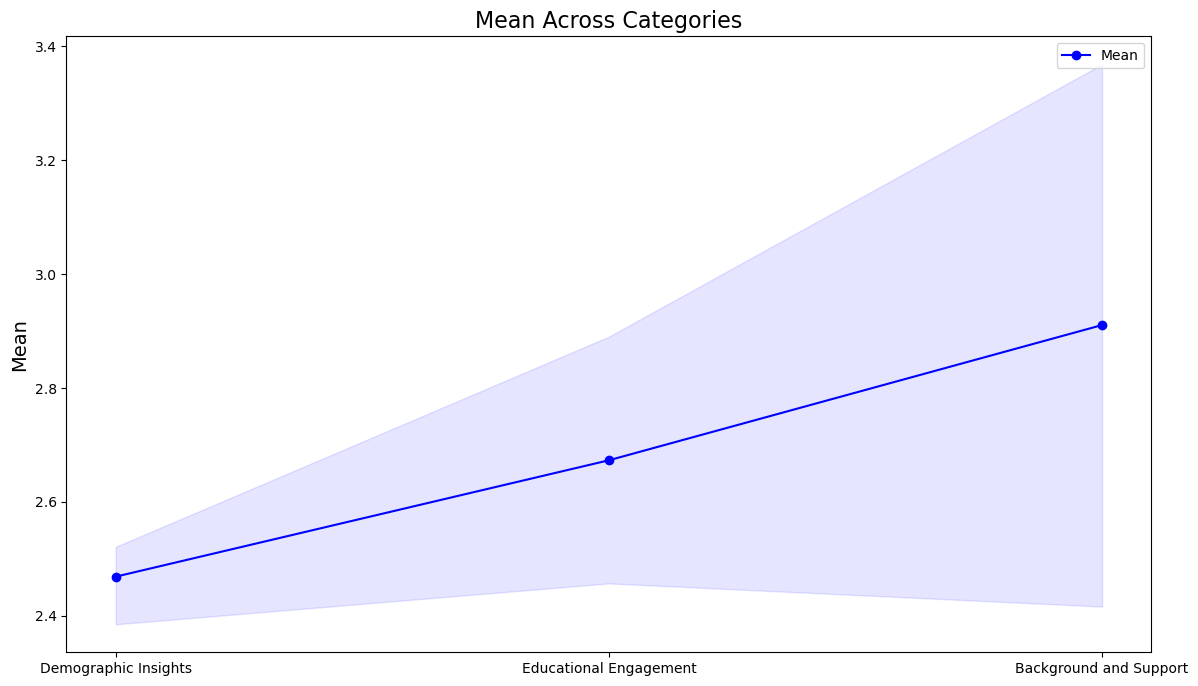

In [105]:
# Datos de las medias para las tres categorías principales
categories = ['Demographic Insights', 'Educational Engagement', 'Background and Support']

# Calcula la media, minima y maxima para cada categoria
data = {
    "Demographic Insights": {
        'Student Profile': 2.385204,
        'Age Range': 2.521236,
        'Gender': 2.500000
    },
    "Educational Engagement": {
        'Program schedule': 2.600547,
        'Delivery Mode': 2.456954,
        'Semester': 2.744898,
        'Previous Standing': 2.890244
    },
    "Background and Support": {
        'Catchment Area': 2.946970,
        'Funding Code': 3.368421,
        'First Gen': 2.416303
    }
}

means = []
mins = []
maxs = []

for category in categories:
    values = list(data[category].values())
    means.append(np.mean(values))
    mins.append(np.min(values))
    maxs.append(np.max(values))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar la línea para las medias
plt.plot(categories, means, label='Mean', color='blue', marker='o')

# Dibujar las áreas sombreadas para el rango de valores
plt.fill_between(categories, mins, maxs, color='blue', alpha=0.1)

ax.set_ylabel('Mean', fontsize=14)
ax.set_title('Mean Across Categories', fontsize=16)
plt.legend()

plt.show()


### Second Draft: Enhanced the graph by adding precise mean value annotations for each category, making the graph more informative at a glance. However, it still needed more depth and clarity.

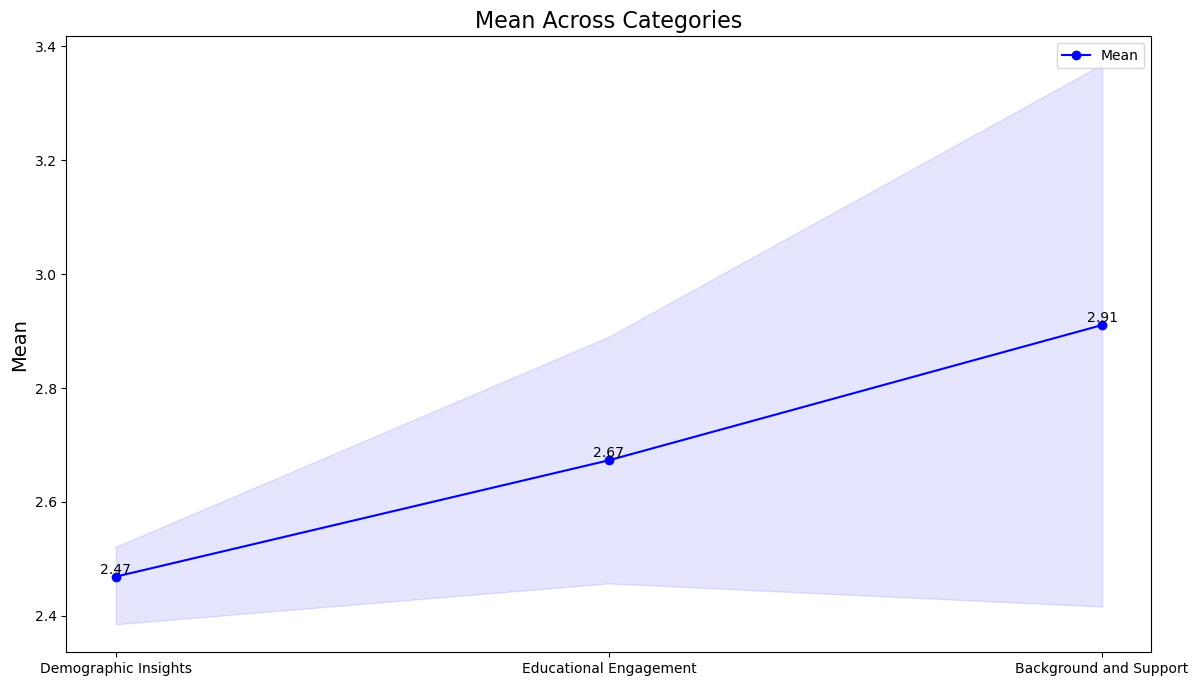

In [106]:
# Datos de las medias para las tres categorías principales
categories = ['Demographic Insights', 'Educational Engagement', 'Background and Support']

# Calcula la media, minima y maxima para cada categoria
data = {
    "Demographic Insights": {
        'Student Profile': 2.385204,
        'Age Range': 2.521236,
        'Gender': 2.500000
    },
    "Educational Engagement": {
        'Program schedule': 2.600547,
        'Delivery Mode': 2.456954,
        'Semester': 2.744898,
        'Previous Standing': 2.890244
    },
    "Background and Support": {
        'Catchment Area': 2.946970,
        'Funding Code': 3.368421,
        'First Gen': 2.416303
    }
}

means = []
mins = []
maxs = []

for category in categories:
    values = list(data[category].values())
    means.append(np.mean(values))
    mins.append(np.min(values))
    maxs.append(np.max(values))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar la línea para las medias
plt.plot(categories, means, label='Mean', color='blue', marker='o')

# Dibujar las áreas sombreadas para el rango de valores
plt.fill_between(categories, mins, maxs, color='blue', alpha=0.1)

# Agregar etiquetas a los puntos
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Mean', fontsize=14)
ax.set_title('Mean Across Categories', fontsize=16)
plt.legend()

plt.show()

### Final Version: Achieved the desired outcome by meticulously labeling each data point within the categories and adjusting the visual layout for maximum clarity. This iteration not only met the brief for a shaded graph but also provided a comprehensive view of the data through detailed annotations and strategic presentation.

#### This progression showcases the power of Python's matplotlib for data visualization and the importance of iterative design in achieving clarity and impact in presenting complex data.

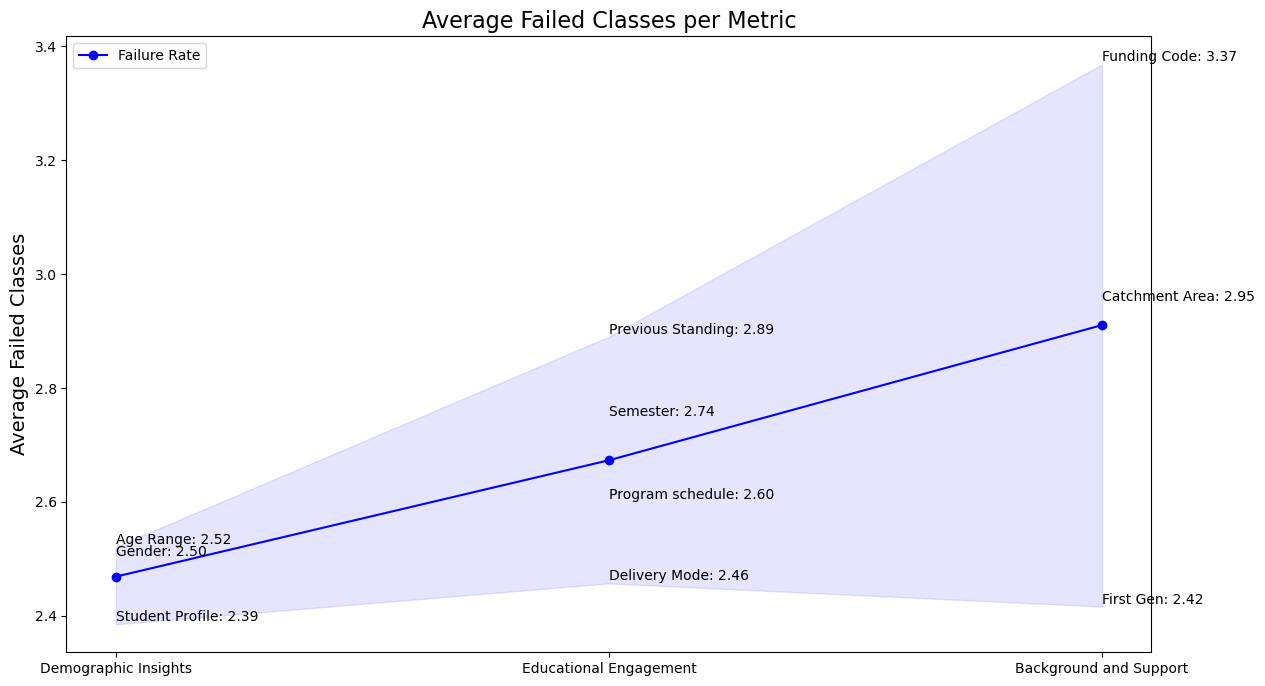

In [107]:
# Datos de las medias para las tres categorías principales
categories = ['Demographic Insights', 'Educational Engagement', 'Background and Support']

# Calcula la media, minima y maxima para cada categoria
data = {
    "Demographic Insights": {
        'Student Profile': 2.385204,
        'Age Range': 2.521236,
        'Gender': 2.500000
    },
    "Educational Engagement": {
        'Program schedule': 2.600547,
        'Delivery Mode': 2.456954,
        'Semester': 2.744898,
        'Previous Standing': 2.890244
    },
    "Background and Support": {
        'Catchment Area': 2.946970,
        'Funding Code': 3.368421,
        'First Gen': 2.416303
    }
}

means = []
mins = []
maxs = []

for category in categories:
    values = list(data[category].values())
    means.append(np.mean(values))
    mins.append(np.min(values))
    maxs.append(np.max(values))

# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar la línea para las medias
plt.plot(categories, means, label='Failure Rate', color='blue', marker='o')

# Dibujar las áreas sombreadas para el rango de valores
plt.fill_between(categories, mins, maxs, color='blue', alpha=0.1)

# Agregar etiquetas a los puntos
for i, category in enumerate(categories):
    for j, (metric, value) in enumerate(data[category].items()):
        ax.text(i, value - 0.00000009 * j, f'{metric}: {value:.2f}', ha='left', va='bottom', fontsize=10)

# Mover la leyenda al lado opuesto
ax.legend(loc='upper left')

ax.set_ylabel('Average Failed Classes', fontsize=14)
ax.set_title('Average Failed Classes per Metric', fontsize=16)

plt.show()

### This visualization presents the average number of failed classes per student across various demographic and academic metrics. It demonstrates a discernible upward trend in failure rates moving from the 'Student Profile' indicator through to the 'Funding Code' metric. Notably, the 'Age' category emerges as a significant demographic factor impacting failure rates. Aspects of 'Educational Engagement,' such as 'Semester' progression and 'Previous Standing,' are also shown to shape these outcomes. The indicators 'Funding Code' and 'Catchment Area' are identified as having the highest correlation with failed class rates, warranting further attention for potential interventions.

**Please note that the metrics are positioned on the chart according to their corresponding submetric rates, which aids in identifying patterns and relationships within the data.**

## After completing the analysis of mean values across key categories, I am now transitioning to a secondary analysis phase focused on exploring correlations within the dataset. This step is crucial for identifying relationships between different variables and understanding how they collectively impact student performance.

Utilizing correlation analysis, I aim to uncover significant patterns that may not be immediately apparent from the mean analysis alone. This deeper insight into how variables interact with each other will provide a solid foundation for the subsequent application of K-means clustering.

The application of K-means clustering will segment the dataset into clusters based on similarities in the data. By examining these clusters, I will identify unique academic challenges present within each group. This clustering approach will help to highlight distinct patterns and challenges faced by different segments of the student population, enabling targeted interventions and support strategies to be developed based on the specific needs of each cluster.

This two-pronged approach of correlation analysis followed by K-means clustering represents a comprehensive strategy to delve deeper into the data, providing a nuanced understanding of the academic challenges students face.

In [109]:
# Print unique values in 'Class Failure Count'
unique_values = unique_students_v1['Class Failure Count'].unique()
print("Unique values in 'Class Failure Count':", unique_values)

Unique values in 'Class Failure Count': [1 2 3 4 5 6 7]


# Creating a one-hot encoding DataFrame while excluding 'Student ID

In [110]:
# Assuming 'Student ID' is not part of the columns to be encoded
categorical_columns = ['Student Profile', 'Delivery Mode', 'Program schedule', 'Age Range', 'Gender', 'Semester', 'Previous Standing', 'First Gen', 'Catchment Area', 'Funding Code']

# Applying one-hot encoding to the DataFrame while excluding 'Student ID'
unique_students_v1 = pd.get_dummies(unique_students_v1, columns=categorical_columns)

print(unique_students_v1.head())

   Class Failure Count Anonymized ID  Student Profile_DOM_1  \
0                    1          ID_1                      0   
1                    1          ID_2                      0   
2                    2          ID_3                      1   
3                    1          ID_4                      1   
4                    3          ID_5                      0   

   Student Profile_DOM_2  Student Profile_INT  Delivery Mode_In Person  \
0                      1                    0                        0   
1                      1                    0                        0   
2                      0                    0                        1   
3                      0                    0                        1   
4                      1                    0                        1   

   Delivery Mode_Online  Program schedule_Post Sec FT  \
0                     1                             0   
1                     1                             1   
2    

In [111]:
df_encoding = unique_students_v1.copy()

In [112]:
print(df_encoding.columns.tolist())

['Class Failure Count', 'Anonymized ID', 'Student Profile_DOM_1', 'Student Profile_DOM_2', 'Student Profile_INT', 'Delivery Mode_In Person', 'Delivery Mode_Online', 'Program schedule_Post Sec FT', 'Program schedule_Post Sec PT', 'Program schedule_Skill Development Programs', 'Age Range_21-25', 'Age Range_26-40', 'Age Range_> 40', 'Age Range_≤ 20', 'Gender_F', 'Gender_M', 'Gender_N', 'Semester_1', 'Semester_2', 'Semester_3', 'Semester_4', 'Semester_5', 'Semester_6', 'Semester_8', 'Previous Standing_Academic Issues', 'Previous Standing_Good Standing', 'Previous Standing_No record', 'First Gen_N', 'First Gen_Y', 'Catchment Area_In City', 'Catchment Area_In Region', 'Catchment Area_Out of Province', 'Catchment Area_Out of Region', 'Catchment Area_Overseas', 'Funding Code_MIN_1', 'Funding Code_MIN_2', 'Funding Code_SELF']


In [113]:
# Define the path and filename for the modified dataset
filename = r"C:\Users\jriquel1\Desktop\Failure Report\Githhub\df_encoding.csv"

# Save the modified DataFrame to a CSV file
df_encoding.to_csv(filename, index=False)


In [128]:
df_encoding = pd.read_csv(r"C:\Users\jriquel1\Desktop\\Failure Report\Githhub\df_encoding.csv")
df_encoding.head(5)

,Class Failure Count,Anonymized ID,Student Profile_DOM_1,Student Profile_DOM_2,Student Profile_INT,Delivery Mode_In Person,Delivery Mode_Online,Program schedule_Post Sec FT,Program schedule_Post Sec PT,Program schedule_Skill Development Programs,...,First Gen_N,First Gen_Y,Catchment Area_In City,Catchment Area_In Region,Catchment Area_Out of Province,Catchment Area_Out of Region,Catchment Area_Overseas,Funding Code_MIN_1,Funding Code_MIN_2,Funding Code_SELF
0,1,ID_1,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,1,ID_2,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,2,ID_3,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
3,1,ID_4,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,3,ID_5,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [129]:
print(df_encoding.columns.tolist())

['Class Failure Count', 'Anonymized ID', 'Student Profile_DOM_1', 'Student Profile_DOM_2', 'Student Profile_INT', 'Delivery Mode_In Person', 'Delivery Mode_Online', 'Program schedule_Post Sec FT', 'Program schedule_Post Sec PT', 'Program schedule_Skill Development Programs', 'Age Range_21-25', 'Age Range_26-40', 'Age Range_> 40', 'Age Range_≤ 20', 'Gender_F', 'Gender_M', 'Gender_N', 'Semester_1', 'Semester_2', 'Semester_3', 'Semester_4', 'Semester_5', 'Semester_6', 'Semester_8', 'Previous Standing_Academic Issues', 'Previous Standing_Good Standing', 'Previous Standing_No record', 'First Gen_N', 'First Gen_Y', 'Catchment Area_In City', 'Catchment Area_In Region', 'Catchment Area_Out of Province', 'Catchment Area_Out of Region', 'Catchment Area_Overseas', 'Funding Code_MIN_1', 'Funding Code_MIN_2', 'Funding Code_SELF']


In [152]:
# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Calculate the correlation matrix
correlation_matrix = df_encoding.corr()

# Extract the correlations of all features with 'F Grade Count'
f_grade_correlations = correlation_matrix['Class Failure Count'].sort_values(ascending=False)

# Print the correlations with 'F Grade Count'
print(f_grade_correlations)

Class Failure Count                            1.000000
Funding Code_MIN_2                             0.192705
Student Profile_DOM_2                          0.185809
Program schedule_Post Sec FT                   0.171704
Semester_1                                     0.166565
First Gen_Y                                    0.111229
Catchment Area_In Region                       0.108072
Previous Standing_Academic Issues              0.107745
Catchment Area_In City                         0.090249
Previous Standing_No record                    0.075115
Gender_N                                       0.046712
Funding Code_MIN_1                             0.042971
Delivery Mode_Online                           0.041385
Age Range_≤ 20                                 0.028289
Age Range_> 40                                 0.021628
Semester_2                                     0.020189
Age Range_21-25                                0.007762
Gender_F                                      -0

### Top 3 Highest Correlations:

* Funding Code_MIN_2  shows a correlation of 0.1927, indicating that the funding source may have a significant relationship with the number of failed classes.
* Profile_DOM_2 has a correlation of 0.1858, suggesting that Indigenous residency status could be linked to academic challenges.
* Program schedule_Post Sec FT  with a correlation of 0.1717, pointing towards full-time post-secondary enrollment as a factor in failed grades.

### Top 3 Lowest (Negative) Correlations:

* Previous Standing_Good Standing has a correlation of -0.1741, indicating that students with a record of good standing are less likely to have failed classes.
* Funding Code_SELF with a correlation of -0.1754, suggesting that self-funded students might have fewer failed classes.
* Semester_4 shows a correlation of -0.1435, implying that students in their fourth semester tend to have fewer failed grades.

These correlations provide insights into factors that might influence the likelihood of failing classes, with financial backing, students profiles, and program schedule among the top influencers positively correlated with failed grades. Conversely, being in good standing, self-funding, and progressing to later semesters correlate negatively, indicating a lower likelihood of failing classes.

In [131]:
from sklearn.cluster import KMeans
import numpy as np

df_kmeans = df_encoding.copy()

In [132]:
# Assuming df is your DataFrame and 'F Grade Count' is the column you want to transform
df_kmeans['Class Failure Count Rank'] = df_kmeans['Class Failure Count'].rank(method='average')


In [133]:
# Prepare the data for clustering
# Assume X is the DataFrame without the non-numeric ID column and the target variable if it's not part of the clustering
X = df_kmeans.drop(['Anonymized ID', 'Class Failure Count'], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

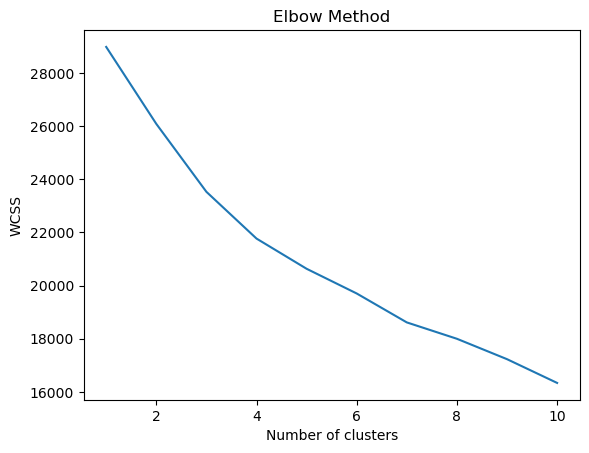

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):  # Example: trying out 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
# Replace `K` with the optimal number of clusters you determined
optimal_k = 4
kmeans = KMeans(n_clusters= optimal_k, init='k-means++', n_init= 10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


# Adding the cluster labels to your original DataFrame
df_kmeans['Cluster'] = y_kmeans

In [153]:
# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Ordena 'df_kmeans' por la columna 'Cluster'
df_kmeans = df_kmeans.sort_values('Cluster')

# Review the distribution of 'F Grade Count' or other features across clusters
cluster_analysis = df_kmeans.groupby('Cluster').mean()

# Add the cluster labels to your 'cluster_analysis' DataFrame
cluster_analysis['Cluster'] = df_kmeans['Cluster'].unique()

print(cluster_analysis)

         Class Failure Count  Student Profile_DOM_1  Student Profile_DOM_2  \
Cluster                                                                      
0                   3.316940               0.000000               1.000000   
1                   2.497143               0.982857               0.017143   
2                   1.506849               0.657534               0.342466   
3                   2.120603               0.000000               0.000000   

         Student Profile_INT  Delivery Mode_In Person  Delivery Mode_Online  \
Cluster                                                                       
0                        0.0                 0.781421              0.218579   
1                        0.0                 0.791429              0.208571   
2                        0.0                 0.219178              0.780822   
3                        1.0                 0.844221              0.155779   

         Program schedule_Post Sec FT  Program schedule_

# The K-means clustering algorithm identified four distinct groups within the student population, each with unique challenges and characteristics as detailed below:

* **Group A: High Academic Challenge**
Average failure rate: 3.42, indicating the highest level of academic challenge among the clusters..

Key Features: This cluster predominantly consists of DOM_2 students (98.2%), with the majority enrolled in full-time post-secondary programs (99.4%). Most of this group prefers in-person learning (75.9%).

* **Group B: Mixed Academic Outcomes**
Average failure rate: 1.51, reflecting mixed academic outcomes with relatively fewer challenges.

 Key Features: Comprises a balanced mix of DOM_1(65.8%) and DOM_2 (34.2%) students. There is a substantial engagement in online learning (78.1%), with significant participation in both part-time programs (53.4%) and skill development programs (46.6%).

* **Group C: Moderate Academic Challenge**
Average failure rate: 2.48, denoting moderate academic challenges.

Key Features: Predominantly composed of DOM_1 students (96.8%), with a strong preference for in-person learning (79.4%). All students in this cluster are enrolled in full-time post-secondary programs.

* **Group D: Diverse Educational Engagement**

Average failure rate: 2.15, indicating slightly lower academic challenges with diverse educational engagement.

Key Features: A high proportion of International students (93.4%) characterizes this cluster. The majority prefer in-person delivery mode (85.4%), and all are enrolled in full-time post-secondary programs.

In [138]:
cluster_analysis.head()

,Class Failure Count,Student Profile_DOM_1,Student Profile_DOM_2,Student Profile_INT,Delivery Mode_In Person,Delivery Mode_Online,Program schedule_Post Sec FT,Program schedule_Post Sec PT,Program schedule_Skill Development Programs,Age Range_21-25,...,Catchment Area_In City,Catchment Area_In Region,Catchment Area_Out of Province,Catchment Area_Out of Region,Catchment Area_Overseas,Funding Code_MIN_1,Funding Code_MIN_2,Funding Code_SELF,Class Failure Count Rank,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.316940,0.000000,1.000000,0.0,0.781421,0.218579,0.994536,0.005464,0.000000,0.289617,...,0.590164,0.377049,0.005464,0.027322,0.0,0.234973,0.584699,0.180328,499.532787,0
1,2.497143,0.982857,0.017143,0.0,0.791429,0.208571,1.000000,0.000000,0.000000,0.288571,...,0.582857,0.105714,0.045714,0.265714,0.0,0.474286,0.000000,0.525714,398.595714,1
2,1.506849,0.657534,0.342466,0.0,0.219178,0.780822,0.000000,0.534247,0.465753,0.123288,...,0.465753,0.356164,0.068493,0.109589,0.0,0.041096,0.095890,0.863014,290.910959,2
3,2.120603,0.000000,0.000000,1.0,0.844221,0.155779,1.000000,0.000000,0.000000,0.482412,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,363.092965,3


# The upcoming code snippets will delve into the composition of each identified cluster, providing granular insight into the detailed submetrics that characterize their academic profiles.

In [139]:
cross_tab = pd.crosstab(cluster_analysis['Cluster'], cluster_analysis['Class Failure Count'])

print(cross_tab)

Class Failure Count  1.506849  2.120603  2.497143  3.316940
Cluster                                                    
0                           0         0         0         1
1                           0         0         1         0
2                           1         0         0         0
3                           0         1         0         0


In [140]:
# Filter the DataFrame to only show rows for cluster 1
cluster_0 = df_kmeans[df_kmeans['Cluster'] == 0]
cluster_1 = df_kmeans[df_kmeans['Cluster'] == 1]
cluster_2 = df_kmeans[df_kmeans['Cluster'] == 2]
cluster_3 = df_kmeans[df_kmeans['Cluster'] == 3]

In [154]:
# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Calculate the mean values for all clusters and store them in a dictionary
clusters_mean = {f'Cluster {i}': df_kmeans[df_kmeans['Cluster'] == i].mean() for i in range(optimal_k)}

# Convert the dictionary to a DataFrame
df_clusters = pd.DataFrame(clusters_mean)

# Print the DataFrame
print(df_clusters)

                                              Cluster 0   Cluster 1  \
Class Failure Count                            3.316940    2.497143   
Student Profile_DOM_1                          0.000000    0.982857   
Student Profile_DOM_2                          1.000000    0.017143   
Student Profile_INT                            0.000000    0.000000   
Delivery Mode_In Person                        0.781421    0.791429   
Delivery Mode_Online                           0.218579    0.208571   
Program schedule_Post Sec FT                   0.994536    1.000000   
Program schedule_Post Sec PT                   0.005464    0.000000   
Program schedule_Skill Development Programs    0.000000    0.000000   
Age Range_21-25                                0.289617    0.288571   
Age Range_26-40                                0.262295    0.171429   
Age Range_> 40                                 0.103825    0.045714   
Age Range_≤ 20                                 0.344262    0.494286   
Gender

### As I approach the Ordinary Least Squares (OLS) Regression analysis, my objective isn't to pinpoint direct, linear relationships but rather to uncover associative trends and patterns within our dataset. Recognizing that academic performance is influenced by a complex interplay of factors, this analysis will help identify which variables hold the most weight in relation to class failure rates and which may warrant further investigation.

In [150]:
df_encoding = pd.read_csv("C:\\Users\\jriquel1\\Desktop\\Failure Report\\Githhub\\df_encoding.csv")

# Separar las características (X) de la variable objetivo (y)
X = df_encoding.drop(['Class Failure Count', 'Anonymized ID'], axis=1)  # Añade 'Anonymized ID' o el nombre de la columna de ID
y = df_encoding['Class Failure Count']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadir una constante al conjunto de entrenamiento
X_train_with_const = sm.add_constant(X_train)

# Ajustar el modelo OLS (Mínimos Cuadrados Ordinarios) a los datos de entrenamiento
model = sm.OLS(y_train, X_train_with_const).fit()

# Imprimir el resumen del modelo para ver los resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Class Failure Count   R-squared:                       0.154
Model:                             OLS   Adj. R-squared:                  0.122
Method:                  Least Squares   F-statistic:                     4.889
Date:                 Fri, 15 Mar 2024   Prob (F-statistic):           1.86e-12
Time:                         11:07:44   Log-Likelihood:                -1243.9
No. Observations:                  644   AIC:                             2536.
Df Residuals:                      620   BIC:                             2643.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# First Conclusion

In carrying out the OLS Regression analysis, I noticed a variety of statistical strengths in the relationships between features and failure rates. Not every feature exhibited a strong link, as the mixed p-values indicated. This complexity in academic performance resonates with my understanding that it cannot be distilled to simple, one-dimensional causes. Personal situations, institutional frameworks, and external variables all play roles, making it crucial to consider the full scope of influencing factors.

Hence, my focus is not on extracting direct causal relationships but on discerning insightful patterns that might guide the development of nuanced academic support strategies. This holistic perspective acknowledges the intricacies of educational journeys and how they affect academic outcomes. The insights from this analysis underscore the necessity for well-rounded support systems that cater to the diverse factors underpinning student success.

## Initial Insights and Next Steps in Academic Performance Analysis

In this first phase of my analysis, I’ve uncovered valuable insights that shed light on academic performance dynamics. This investigation has highlighted pivotal demographic and behavioral indicators that significantly correlate with student failure rates. Although this is my initial foray into such a complex dataset, the results have provided a substantial foundation from which to build a more nuanced understanding over time.

For the subsequent part of my project, which I'll conduct in a separate notebook, I'll dive into specific subsets of the data. I’ll also evaluate academic alert reports that could offer additional perspectives on the patterns identified in this initial analysis. My strategy for this next step involves a detailed risk stratification for academic intervention:

* **At Risk: Identifying students with 1 or 2 failed classes for preliminary intervention.**

* **Elevated Risk: Pinpointing students with 3 or more failed classes in the upper grade range for more focused support.**

* **Critical Risk: Highlighting those with multiple class failures and very low grades as a high priority for immediate support.**

This risk categorization is crucial for targeting the right students with the appropriate level of academic assistance. By maintaining the same analytical lens used in the class failure rates assessment, I aim to uncover and understand commonalities across different student experiences. I'm committed to refining our academic support strategies, making them as informed and effective as possible.

## Check out Part Two for further analysis and detailed insights!